### Review lecture, example 2:

Frame-based analysis, low-level feature estimation: energy and maxima

The review lecture targets warming up with simple audio signal processing tasks from previous semester. In the second example, we review applying framing to a signal, computing two very simple low-level features for each frame.

Your part to be implemented is marked with: #Your code starts here ...  #Your code ends here

In [2]:
import os
import sys
import numpy as np
from scipy.signal import get_window
import matplotlib.pyplot as plt
#Adding to path the models folder of sms-tools
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/'))
sys.path.append(os.path.join(os.path.dirname('__file__'), 'sms-tools/software/models/utilFunctions_C/'))

import utilFunctions as UF

%matplotlib inline

In [3]:
#Reading a sample wave file
soundsDIR='sms-tools/sounds/'
(fs,x)=UF.wavread(soundsDIR+'piano.wav')
#Normalize maximum amplitude to 1
x=x/np.max(np.abs(x))
#Setting the parameters
windowSize=1024
hopSize=512
startIndexes=np.arange(0, x.size-windowSize,hopSize, dtype=int)#frame/window start indexes
numWindows=startIndexes.size

The energy of a discrete time signal can be computed as:
\begin{equation}
energy = \sum_{n = 0}^{N-1} |x[n]|^2
\end{equation}
where x[n] refers to the discrete time signal sample at index n

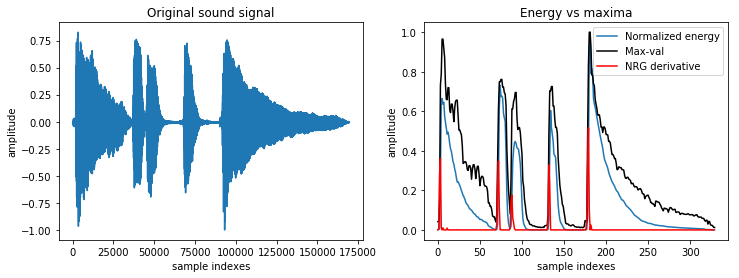

In [4]:
#Plot time-domain signal and the energy signal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x)
plt.title('Original sound signal')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')


#Your code starts here----------
#Write the code to perform windowing and feature estimation
# - features to be computed: energy and maximum amplitude
# - plot energy and maximum amplitude

NRG=np.zeros_like(startIndexes,dtype=float)#initializing the array for keeping energy values
maxVal=np.zeros_like(startIndexes,dtype=float)#initializing the array for maximum values

#Windowing (use variables: startIndexes and numWindows)


#Your code ends here----------

#Normalize the arrays for the simplicity of viewing them together
plt.subplot(1, 2, 2)
plt.plot(NRG,label='Normalized energy')
plt.plot(maxVal,'k',label='Max-val')
plt.title('Energy vs maxima')
plt.ylabel('amplitude')
plt.xlabel('sample indexes')
plt.axis('tight')
plt.legend(loc='best')

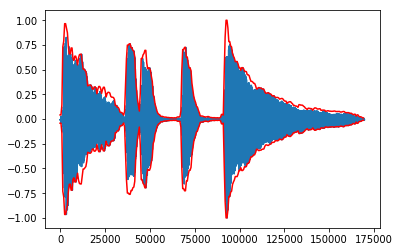

In [5]:
#Optional: Plotting maximum amplitude in sync with the waveform
plt.plot(x)
plt.plot(np.arange(maxVal.size)*(x.size/maxVal.size),maxVal,'r')
plt.plot(np.arange(maxVal.size)*(x.size/maxVal.size),-maxVal,'r')